In [8]:
import numpy as np
import matplotlib.pyplot as pt
import cv2

In [9]:
def d2r(d):
    return d * np.pi / 180

def rotation(V,theta,sf):
    vxnew = (V[:,0] * np.cos(theta) - V[:,1] * np.sin(theta)) * sf
    vynew = (V[:,0] * np.sin(theta) + V[:,1] * np.cos(theta)) * sf
    
    Vnew = []
    for i in range(len(V)):
        Vnew.append([vxnew[i], vynew[i]])
    Vnew = np.array(Vnew)
    
    return Vnew

def angle(l1,l2,l3):
    return np.arccos((l1 ** 2 + l2 ** 2 - l3 ** 2) / (2 * l1 * l2))

def bar(V):
    dist = (V[:,0] ** 2 + V[:,1] ** 2) ** 0.5
    return dist

In [50]:
#parameters
alpha = d2r(90)
beta = np.arctan(1.4)
gamma = np.pi - beta - alpha
sf = 1.4
l1 = 5 #max horizontal distance
l2 = 3.5


X = np.array([[5.5,0]]) #anything on the radius 7.5cm (2.5 cm + 5 cm). They become collinear1 at radius 5.69
# the mechanism loses collinearity when taken less than 5.6 (derivation required) (extreme points)

theta = angle(l1 ,bar(X) ,l2 / (np.sin(beta) / np.sin(gamma))) 
#part 1
Y = rotation(X, alpha, sf) # bug 3
OA = rotation(X, theta, l1 / bar(X)) #Marking OA
psi = angle(bar(X),(l2 * np.sin(gamma) / np.sin(beta)),bar(OA))
AX = -rotation(-X, -psi, (l2 * np.sin(gamma) / np.sin(beta)) / bar(X))
AC = rotation(AX, alpha, l2 / bar(AX))
XC = AC - AX #bug1 
OC = OA + AC

#part2
BC = OA #parallelogram
OB = AC
BY = rotation(BC,alpha,1 /(np.sin(gamma) / np.sin(beta)))
theta

array([0.47145347])

End of Phase 1

Range analysis (all the values which yeild a valid value of theta)
a. no constraints

C:\Users\RV NAYAN\AppData\Local\Temp\ipykernel_732\502195838.py:16: RuntimeWarning: invalid value encountered in arccos
  return np.arccos((l1 ** 2 + l2 ** 2 - l3 ** 2) / (2 * l1 * l2))


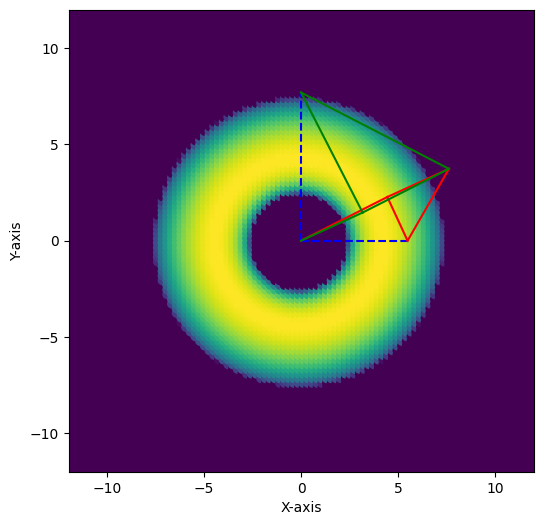

([3.179271708275549, 8.881784197001252e-16, 7.633817162821003],
 [1.4636363636363634, 7.699999999999999, 3.7345447266903267])

In [51]:
al = np.arctan(BC[:,1] / BC[:,0])
x = np.linspace(-12, 12, 100)
y = np.linspace(-12, 12, 100)

X1 = []
R = 2
t = []
for i in x:
    x1 = []
    for j in y:
        x1.append([i,j])
    x1 = np.array(x1)
    X1.append(x1)

    t.append(angle(l1 ,bar(x1) ,l2 / (np.sin(beta) / np.sin(gamma))))
    
t = np.array(t).reshape(-1,1)
nan_indices = np.isnan(t)


t[nan_indices] = 0
points = [(a, b) for a in x for b in y]

x_values, y_values = zip(*points)
pt.scatter(x_values, y_values, c=t)
pt.xlabel('X-axis')
pt.ylabel('Y-axis')
pt.rcParams['figure.figsize'] = [6,6]
#pt.text((0+X[0,0]) / 2, (0+X[0,1]) / 2, (X[0,0],X[0,1]), fontsize=12, color='black', ha='center', va='top')
pt.plot([0,X[0,0]],[0,X[0,1]],c='blue',linestyle='dashed')
pt.plot([0,OA[0,0]],[0,OA[0,1]], c= 'red')
pt.plot([OA[0,0],AX[0,0] + OA[0,0]],[OA[0,1],AX[0,1] + OA[0,1]],c='red')
pt.plot([OA[0,0],AC[0,0] + OA[0,0]],[OA[0,1],AC[0,1] + OA[0,1]],c='red')
pt.plot([OC[0,0],X[0,0]], [OC[0,1],X[0,1]],c='red')
#pt.fill_between([OA[0,0], AX[0,0] + OA[0,0], AC[0,0] + OA[0,0]], [OA[0,1], AX[0,1] + OA[0,1], OC[0,1] + X[0,1]], alpha=0.5, color='red') #shading area


pt.plot([0,Y[0,0]],[0,Y[0,1]],c='blue',linestyle='dashed')
pt.plot([0,OB[0,0]],[0,OB[0,1]],c='green') #bug2 MAIN ERROR
pt.plot([OB[0,0],BY[0,0] + OB[0,0]],[OB[0,1], BY[0,1] + OB[0,1]],c='green') #bug 4
pt.plot([OB[0,0],OC[0,0]],[OB[0,1],OC[0,1]],c='green') #bug 3
pt.plot([OC[0,0],Y[0,0]], [OC[0,1],Y[0,1]],c='green')
#pt.text((0+Y[0,0]) / 2, (0+Y[0,1]) / 2, (Y[0,0],Y[0,1]), fontsize=12, color='black', ha='center', va='top')
#pt.fill_between([OB[0,0] , (OB[0,0] + BY[0,0]) , OC[0,0]], [OB[0,1], BY[0,1] + OB[0,1], OC[0,1]], alpha=0.3, color='blue') #shading area


pt.plot(X[:, 0], X[:, 1], c = 'black')
# pt.plot(Y[:, 0], Y[:, 1], c = 'black')
pt.xlim(-12,12)
pt.ylim(-12,12)
pt.show()
([OB[0,0] , (OB[0,0] + BY[0,0]) , OC[0,0]],[OB[0,1], BY[0,1] + OB[0,1], OC[0,1]])

with constraints

In [18]:
#how to apply colinearity condition

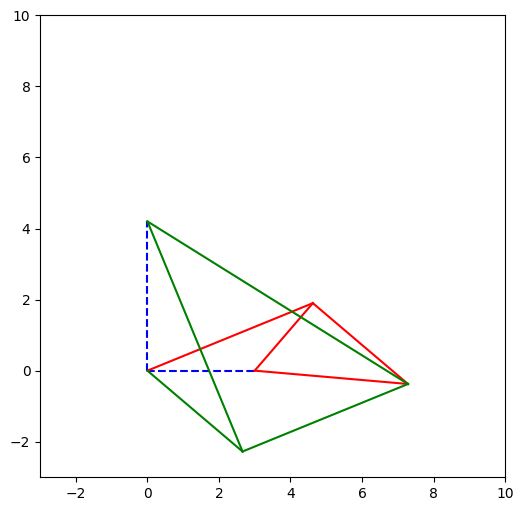

In [47]:
pt.rcParams['figure.figsize'] = [6,6]

pt.plot([0,X[0,0]],[0,X[0,1]],c='blue',linestyle='dashed')
pt.plot([0,OA[0,0]],[0,OA[0,1]], c= 'red')
pt.plot([OA[0,0],AX[0,0] + OA[0,0]],[OA[0,1],AX[0,1] + OA[0,1]],c='red')
pt.plot([OA[0,0],AC[0,0] + OA[0,0]],[OA[0,1],AC[0,1] + OA[0,1]],c='red')
pt.plot([OC[0,0],X[0,0]], [OC[0,1],X[0,1]],c='red')


pt.plot([0,Y[0,0]],[0,Y[0,1]],c='blue',linestyle='dashed')
pt.plot([0,OB[0,0]],[0,OB[0,1]],c='green') #bug2 MAIN ERROR
pt.plot([OB[0,0],BY[0,0] + OB[0,0]],[OB[0,1], BY[0,1] + OB[0,1]],c='green') #bug 4
pt.plot([OB[0,0],OC[0,0]],[OB[0,1],OC[0,1]],c='green') #bug 3
pt.plot([OC[0,0],Y[0,0]], [OC[0,1],Y[0,1]],c='green')
#pt.text((0+Y[0,0]) / 2, (0+Y[0,1]) / 2, bar(AX), fontsize=12, color='black', ha='center', va='top')

pt.plot(X[:, 0], X[:, 1], c = 'black')
#pt.fill_between([OB[0,0] , (OB[0,0] + BY[0,0]) , OC[0,0]], [OB[0,1], BY[0,1] + OB[0,1], OC[0,1]], alpha=0.3, color='blue') #shading area
#pt.fill_between([OA[0,0], AX[0,0] + OA[0,0], AC[0,0] + OA[0,0]], [OA[0,1], AX[0,1] + OA[0,1], OC[0,1] + X[0,1]], alpha=0.5, color='red') #shading area


# pt.plot(Y[:, 0], Y[:, 1], c = 'black')
pt.xlim(-3,10)
pt.ylim(-3,10)
pt.show()

End of Phase II

In [15]:
def dist(Y):
    return (Y[0] ** 2 + Y[1] ** 2) ** 0.5
def plotter(X, OA, OB, OC, AX, BY, AC, BC, Y,i,Ye):
    pt.rcParams['figure.figsize'] = [6,6]

    pt.plot([0,X[i,0]],[0,X[i,1]],c='blue',linestyle='dashed')
    pt.plot([0,OA[i,0]],[0,OA[i,1]], c= 'red')
    pt.plot([OA[i,0],AX[i,0] + OA[i,0]],[OA[i,1],AX[i,1] + OA[i,1]],c='red')
    pt.plot([OA[i,0],AC[i,0] + OA[i,0]],[OA[i,1],AC[i,1] + OA[i,1]],c='red')
    pt.plot([OC[i,0],X[i,0]], [OC[i,1],X[i,1]],c='red')


    pt.plot([0,Y[i,0]],[0,Y[i,1]],c='blue',linestyle='dashed')
#     pt.text((0+Y[i,0]) / 2, (0+Y[i,1]) / 2, dist(AX[i]), fontsize=12, color='black', ha='center', va='top')
    pt.plot([0,OB[i,0]],[0,OB[i,1]],c='green') #bug2 MAIN ERROR
    pt.plot([OB[i,0],BY[i,0] + OB[i,0]],[OB[i,1], BY[i,1] + OB[i,1]],c='green') #bug 4
    pt.plot([OB[i,0],OC[i,0]],[OB[i,1],OC[i,1]],c='green') #bug 3
    pt.plot([OC[i,0],Y[i,0]], [OC[i,1],Y[i,1]],c='green')

    pt.plot(X[:, 0], X[:, 1], c = 'black')
    pt.plot(Ye[:, 0], Ye[:, 1], c = 'black',label='Theory')
    pt.plot(Y[:, 0], Y[:, 1], c = 'black',linestyle='dashed',label='Experimental')
    pt.xlim(-5,14)
    pt.ylim(-5,14)
    pt.legend()
    pt.savefig(f'images/frame_{i:04d}.png')
    pt.close()

In [170]:
#adding a video
frame_rate = 10  # Adjust the frame rate as needed
output_video_path = 'video/output_video.mp4'
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter(output_video_path, fourcc, frame_rate, (600, 600))


In [171]:
X = []
x = np.linspace(-1.5,1.25,40)
for i in range(len(x)):
    if x[i] < 0:
        X.append([6,x[i]])
    else:
        X.append([6 + x[i],0])

X = np.array(X)


In [172]:
theta = angle(l1 ,bar(X) ,l2 / (np.sin(beta) / np.sin(gamma))) 
Y = rotation(X, alpha, sf) # bug 3
OA = rotation(X, theta, l1 / bar(X)) #Marking OA
psi = angle(bar(X),(l2 * np.sin(gamma) / np.sin(beta)),bar(OA))
AX = -rotation(-X, -psi, (l2 * np.sin(gamma) / np.sin(beta)) / bar(X))
AC = rotation(AX, alpha, l2 / bar(AX))
XC = AC - AX #bug1 
OC = OA + AC

BC = OA #parallelogram
OB = AC
BY = rotation(BC,alpha,1 /(np.sin(gamma) / np.sin(beta)))
bar(Y),X
for i in range(len(X)):
    plotter(X, OA, OB, OC, AX, BY, AC, BC, Y,i, Ye)


In [173]:
for t2 in range(len(X)):
    frame_path = f'images/frame_{t2:04d}.png'
    
    frame = cv2.imread(frame_path)
    if t2 % 10 == 0:
        print(f'completed adding frame_{t2:04d}.png')
    out.write(frame)
out.release()
print()
print('Process completed. New video added to the folder /video')

completed adding frame_0000.png
completed adding frame_0010.png
completed adding frame_0020.png
completed adding frame_0030.png

Process completed. New video added to the folder /video


In [196]:
import os
# run this box to Clean up the temporary image frames (must!!)
for t2 in range(len(X)):
    file_path = f'images/frame_{t2:04d}.png'
    if os.path.exists(file_path):
        os.remove(file_path)